In [4]:

import random
import torch
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = d2l.synthetic_data(true_w, true_b, 1000)
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.1593, -0.4016]) 
label: tensor([3.2450])


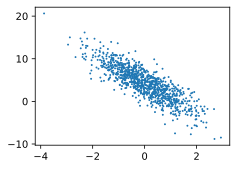

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [18]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break
    
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

lr = 0.03
num_epochs = 3
net = d2l.linreg
loss = d2l.squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        d2l.sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

tensor([[ 0.0172,  0.1885],
        [-0.3765,  0.4342],
        [-1.5438, -1.4914],
        [ 0.9458,  0.4084],
        [-0.4794,  0.7145],
        [ 0.5437, -2.0017],
        [ 1.2338,  0.4004],
        [-0.7911, -0.1380],
        [-1.8086,  1.0066],
        [-0.4567,  0.7982]]) 
 tensor([[ 3.5946],
        [ 1.9863],
        [ 6.1727],
        [ 4.6983],
        [ 0.8181],
        [12.0826],
        [ 5.3041],
        [ 3.0875],
        [-2.8530],
        [ 0.5957]])
epoch 1, loss 0.036233
epoch 2, loss 0.000126
epoch 3, loss 0.000049


In [16]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0004, -0.0013], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0003], grad_fn=<RsubBackward1>)
